# Students Project 2023/24

## Workproject Clustering Validation



## 1. Define the paths and args 
Set the arguments and paths to execute the pipeline.

In [26]:
## Arguments

# n_neighbors
n_neighbors=15
neighbor_method='umap'
neighbor_metric='euclidean'

# UMAP
umap_spread=2.5
umap_min_dist=0.1

# Plot embedding
color='total_counts'

# Feel free to extent this with arguments needed downstream

# Filepaths:

h5ad_esophagus = "/mnt/workspace_stud/mbentse/catlas_objects/esophagus_muscularis_SM-A8CPH.h5ad"
h5ad_heart = "/mnt/workspace_stud/mbentse/catlas_objects/heart_lv_SM-IOBHO.h5ad"
h5ad_cerebellum = "/mnt/workspace_stud/mbentse/catlas_objects/cerebellum_sample_58.h5ad"
h5ad_nerve_tibial = "/mnt/workspace_stud/mbentse/catlas_objects/nerve_tibial_SM-CHLWU.h5ad"


## 2. Imports

In [2]:

# Import packages
import episcanpy as epi
import scanpy as sc
import numpy as np
import datetime
import matplotlib.pyplot as plt
from importlib import reload
import time
import anndata as ad

from utils import load_metadata
import ari_optimizer
reload(ari_optimizer)
import pca_optimizer
reload(pca_optimizer)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import anndata as ad
import pandas as pd

### Read in Metadata

In [3]:
#cell_metadata = "/home/stud2/Cell_metadata.tsv"
esophagus_muscularis_metadata = "/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/esophagus_muscularis_metadata.tsv"
heart_metadata = "/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/heart_lv_SM-IOBHO_metadata.tsv"
cerebellum_metadata = "/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/cerebellum_sample_58_metadata.tsv"
nerve_tibial_metadata = "/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/nerve_tibial_SM-CHLWU_metadata.tsv"
#---
metadata_list = [esophagus_muscularis_metadata, heart_metadata, cerebellum_metadata, nerve_tibial_metadata]

concatenated_df = pd.DataFrame()

# Iterate through each TSV file and concatenate its contents
for tsv_file in metadata_list:
    # Assuming your TSV files have a header, if not, set header=None
    df = pd.read_csv(tsv_file, sep='\t')
    
    # Concatenate along the rows (axis=0)
    concatenated_df = pd.concat([concatenated_df, df], axis=0, ignore_index=True)

# Save the concatenated DataFrame to a new TSV file
concatenated_df.to_csv('/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/4tissue_metadata.tsv', sep='\t', index=False)

tissue4_metadata = '/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/4tissue_metadata.tsv'

## 3. Read h5ad files and build anndata objects

In [4]:
%%time
adata_esophagus = epi.read_h5ad(h5ad_esophagus)
adata_heart = epi.read_h5ad(h5ad_heart)
adata_cerebellum = epi.read_h5ad(h5ad_cerebellum)
adata_nerve_tibial = epi.read_h5ad(h5ad_nerve_tibial)

adata = ad.concat([adata_esophagus, adata_heart, adata_cerebellum, adata_nerve_tibial], axis=0)

#adata = adata_heart.copy()
#adata = adata_cerebellum.copy()
#adata = adata_nerve_tibial.copy()


CPU times: user 4.63 s, sys: 2.07 s, total: 6.7 s
Wall time: 8.04 s


In [5]:
adata.obs

""
index
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC
...
nerve_tibial_SM-CHLWU_1+GTTTGAGTCACGCGATACAAAT
nerve_tibial_SM-CHLWU_1+TAACCACTACTTGTTCCTCTGC
nerve_tibial_SM-CHLWU_1+TCGGGATAAACTGGGCTTGGTA


## 4. Read Metadata 

In [6]:
%%time
# Example: ['cellID', 'logUMI', 'tsse', 'tissue', 'cell type', 'Life stage']
columns_to_keep = ['cell type']
load_metadata(adata, tissue4_metadata, columns_to_keep=columns_to_keep)

CPU times: user 130 ms, sys: 6.78 ms, total: 137 ms
Wall time: 152 ms


In [7]:
# add ontology metadata
ontology_path = f"/mnt/workspace_stud/allstud/wp1/data//Cell_ontology.tsv"
ontology_df = pd.read_csv(ontology_path, delimiter="\t")
ontology_df = ontology_df.rename(columns={
    "Cell type": "cell type", 
    "closest Cell Ontology term(s)": "ontology label",
    "Cell Ontology ID": "ontology id"})
adata.obs = pd.merge(adata.obs, ontology_df, how="left", on="cell type")

In [8]:
# only keep labels that are bigger than 1% of cell count
threshold = len(adata.obs["ontology label"]) / 100.0
counts = adata.obs["ontology label"].value_counts()
valid_labels = counts[counts >= threshold].index
adata = adata[adata.obs["ontology label"].isin(valid_labels)].copy()

## 5. Add metrics

In [9]:
# compute metrics
sc.pp.calculate_qc_metrics(adata=adata, percent_top=None, inplace=True)

## 6. Normalize adata

In [10]:
sc.pp.normalize_total(adata, exclude_highly_expressed=False, target_sum=None)
sc.pp.log1p(adata)

## 7. Ajusting Parameters 

In [ ]:
%%capture testing_function
max_op_louvain_ari, max_op_louvain_ncomp, max_op_louvain_res, \
max_op_leiden_ari, max_op_leiden_ncomp, max_op_leiden_res, \
max_op_kmeans_ari, max_op_kmeans_ncomp, max_op_kmeans_kclust, \
op_louvain_ari_dict, \
op_leiden_ari_dict, \
op_kmeans_ari_dict, \
= pca_optimizer.pca_optimizer_m1(adata, 1, 50)

print("<>"*20)
print(f'"Best" Optimized ARI-louvain:\t{max_op_louvain_ari}\tn_comps:{max_op_louvain_ncomp}\tres:{max_op_louvain_res}')
print(f'"Best" Optimized ARI-leiden:\t{max_op_leiden_ari}\tn_comps:{max_op_leiden_ncomp}\tres:{max_op_leiden_res}')
print(f'"Best" Optimized ARI-kmeans:\t{max_op_kmeans_ari}\tn_comps:{max_op_kmeans_ncomp}\tk cluster:{max_op_kmeans_kclust}')
print("<>"*20)

In [16]:
testing_function.show()

pca_comps:	 1
Optimized ARI-louvain:	0.030508225055796156	(resolution:0.1)
Optimized ARI-leiden:	0.01756833238907331	(resolution:0.1)
Optimized ARI-kmeans:	0.09397246522820912	(clusters:3)
pca_comps:	 2
Optimized ARI-louvain:	0.22109161297113591	(resolution:0.2)
Optimized ARI-leiden:	0.21675741419424968	(resolution:0.1)
Optimized ARI-kmeans:	0.20238565974829012	(clusters:4)
pca_comps:	 3
Optimized ARI-louvain:	0.33810136640808763	(resolution:0.1)
Optimized ARI-leiden:	0.3189778256434353	(resolution:0.1)
Optimized ARI-kmeans:	0.27893401601409634	(clusters:5)
pca_comps:	 4
Optimized ARI-louvain:	0.4430935294570918	(resolution:0.1)
Optimized ARI-leiden:	0.462032417782947	(resolution:0.1)
Optimized ARI-kmeans:	0.3498490482786114	(clusters:6)
pca_comps:	 5
Optimized ARI-louvain:	0.5396975467723256	(resolution:0.2)
Optimized ARI-leiden:	0.46761810635780043	(resolution:0.3)
Optimized ARI-kmeans:	0.3847384107885747	(clusters:7)
pca_comps:	 6
Optimized ARI-louvain:	0.5180697490938053	(resolutio

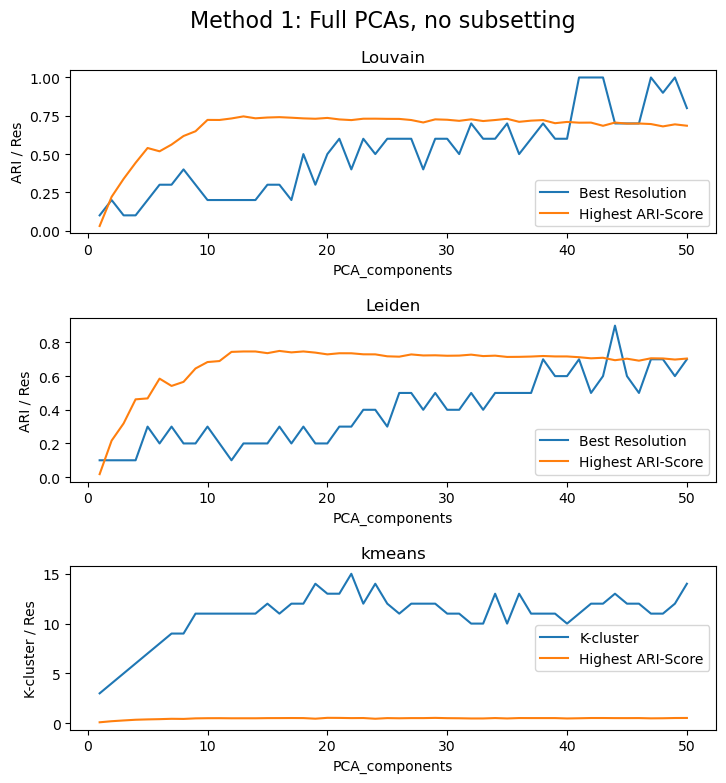

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 8))
fig.tight_layout(pad=4.0)
fig.suptitle("Method 1: Full PCAs, no subsetting", fontsize=16, y= 1)

ax1.plot(op_louvain_ari_dict.keys(), op_louvain_ari_dict.values())
ax1.set_title('Louvain')
ax1.set_xlabel('PCA_components')
ax1.set_ylabel('ARI / Res')
ax1.legend(["Best Resolution", "Highest ARI-Score"])

ax2.plot(op_leiden_ari_dict.keys(), op_leiden_ari_dict.values())
ax2.set_title('Leiden')
ax2.set_xlabel('PCA_components')
ax2.set_ylabel('ARI / Res')
ax2.legend(["Best Resolution", "Highest ARI-Score"])

ax3.plot(op_kmeans_ari_dict.keys(), op_kmeans_ari_dict.values())
ax3.set_title('kmeans')
ax3.set_xlabel('PCA_components')
ax3.set_ylabel('K-cluster / Res')
ax3.legend(["K-cluster", "Highest ARI-Score"])

plt.show()

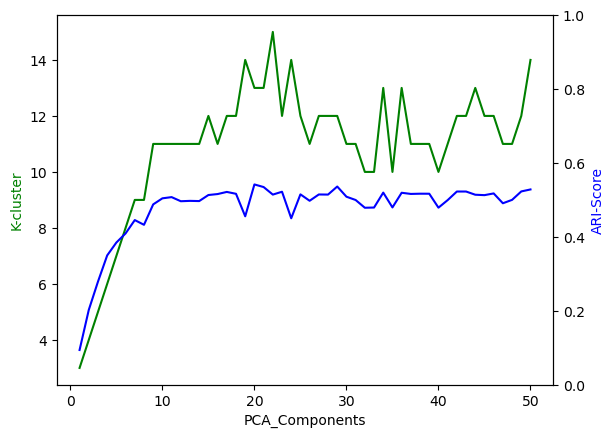

In [19]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(op_kmeans_ari_dict.keys(), [tup[0] for tup in op_kmeans_ari_dict.values()], 'g-')
ax2.plot(op_kmeans_ari_dict.keys(), [tup[1] for tup in op_kmeans_ari_dict.values()], 'b-')
ax2.set_ylim([0, 1])

ax1.set_xlabel('PCA_Components')
ax1.set_ylabel('K-cluster', color='g')
ax2.set_ylabel('ARI-Score', color='b')

plt.show()

## 8. Best Clustering so far

### 1. Louvain

In [32]:

# Performe a PCA
sc.pp.pca(adata, n_comps= max_op_louvain_ncomp, use_highly_variable=False) # svd_solver="lobpcg"

# Compute the neighborhood using UMAP
sc.pp.neighbors(adata, n_neighbors=n_neighbors, method=neighbor_method, metric=neighbor_metric)

# UMAP embedding
sc.tl.umap(adata, spread=umap_spread, min_dist=umap_min_dist)

# Performe the clustering
louvain_resolution = max_op_louvain_res
louvain_r_tag = f'louvain-R:{louvain_resolution}'
sc.tl.louvain(adata, resolution=louvain_resolution, key_added=louvain_r_tag)

### 2. Leiden

In [29]:

# Performe a PCA
sc.pp.pca(adata, n_comps= max_op_leiden_ncomp, use_highly_variable=False) # svd_solver="lobpcg"

# Compute the neighborhood using UMAP
sc.pp.neighbors(adata, n_neighbors=n_neighbors, method=neighbor_method, metric=neighbor_metric)

# UMAP embedding
sc.tl.umap(adata, spread=umap_spread, min_dist=umap_min_dist)

# Performe the clustering
leiden_resolution = max_op_leiden_res
leiden_r_tag = f'leiden-R:{leiden_resolution}'
sc.tl.leiden(adata, resolution=leiden_resolution, key_added=leiden_r_tag)

### 3. kmeans

In [30]:
# Performe a PCA
sc.pp.pca(adata, n_comps= max_op_kmeans_ncomp, use_highly_variable=False) # svd_solver="lobpcg"

# Compute the neighborhood using UMAP
sc.pp.neighbors(adata, n_neighbors=n_neighbors, method=neighbor_method, metric=neighbor_metric)

# UMAP embedding
sc.tl.umap(adata, spread=umap_spread, min_dist=umap_min_dist)

# Performes a basic kmeans clustering
epi.tl.kmeans(adata, num_clusters= max_op_kmeans_kclust)

### 4. Plotting

In [42]:
adata.obs

,cell type,ontology label,ontology id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,leiden-R:0.2,leiden-R:0.3,kmeans,louvain-R:0.2
16,Smooth Muscle (Esophageal Muscularis) 1,smooth muscle cell of the esophagus,CL:0002599,2410,7.787797,3953.0,8.282483,2,3,6,3
17,Smooth Muscle (Esophageal Muscularis) 1,smooth muscle cell of the esophagus,CL:0002599,4710,8.457655,7891.0,8.973605,2,3,6,3
18,Smooth Muscle (Esophageal Muscularis) 1,smooth muscle cell of the esophagus,CL:0002599,2866,7.961021,4669.0,8.448915,2,3,12,3
19,Smooth Muscle (Esophageal Muscularis) 1,smooth muscle cell of the esophagus,CL:0002599,8464,9.043695,14382.0,9.573802,2,3,6,3
20,Smooth Muscle (Esophageal Muscularis) 1,smooth muscle cell of the esophagus,CL:0002599,8500,9.047939,14767.0,9.600218,2,3,6,3
...,...,...,...,...,...,...,...,...,...,...,...
25938,Pericyte (General) 2,pericyte cell,CL:0000669,1585,7.368970,2604.0,7.865188,9,8,3,9
25939,Pericyte (General) 2,pericyte cell,CL:0000669,1807,7.499977,2991.0,8.003697,9,8,3,9
25940,Pericyte (General) 2,pericyte cell,CL:0000669,3242,8.084254,5248.0,8.565793,9,8,3,9
25941,Pericyte (General) 2,pericyte cell,CL:0000669,1867,7.532624,3078.0,8.032360,9,8,8,9


[<Axes: title={'center': 'louvain-R:0.2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'leiden-R:0.3'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'kmeans'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ontology label'}, xlabel='UMAP1', ylabel='UMAP2'>]

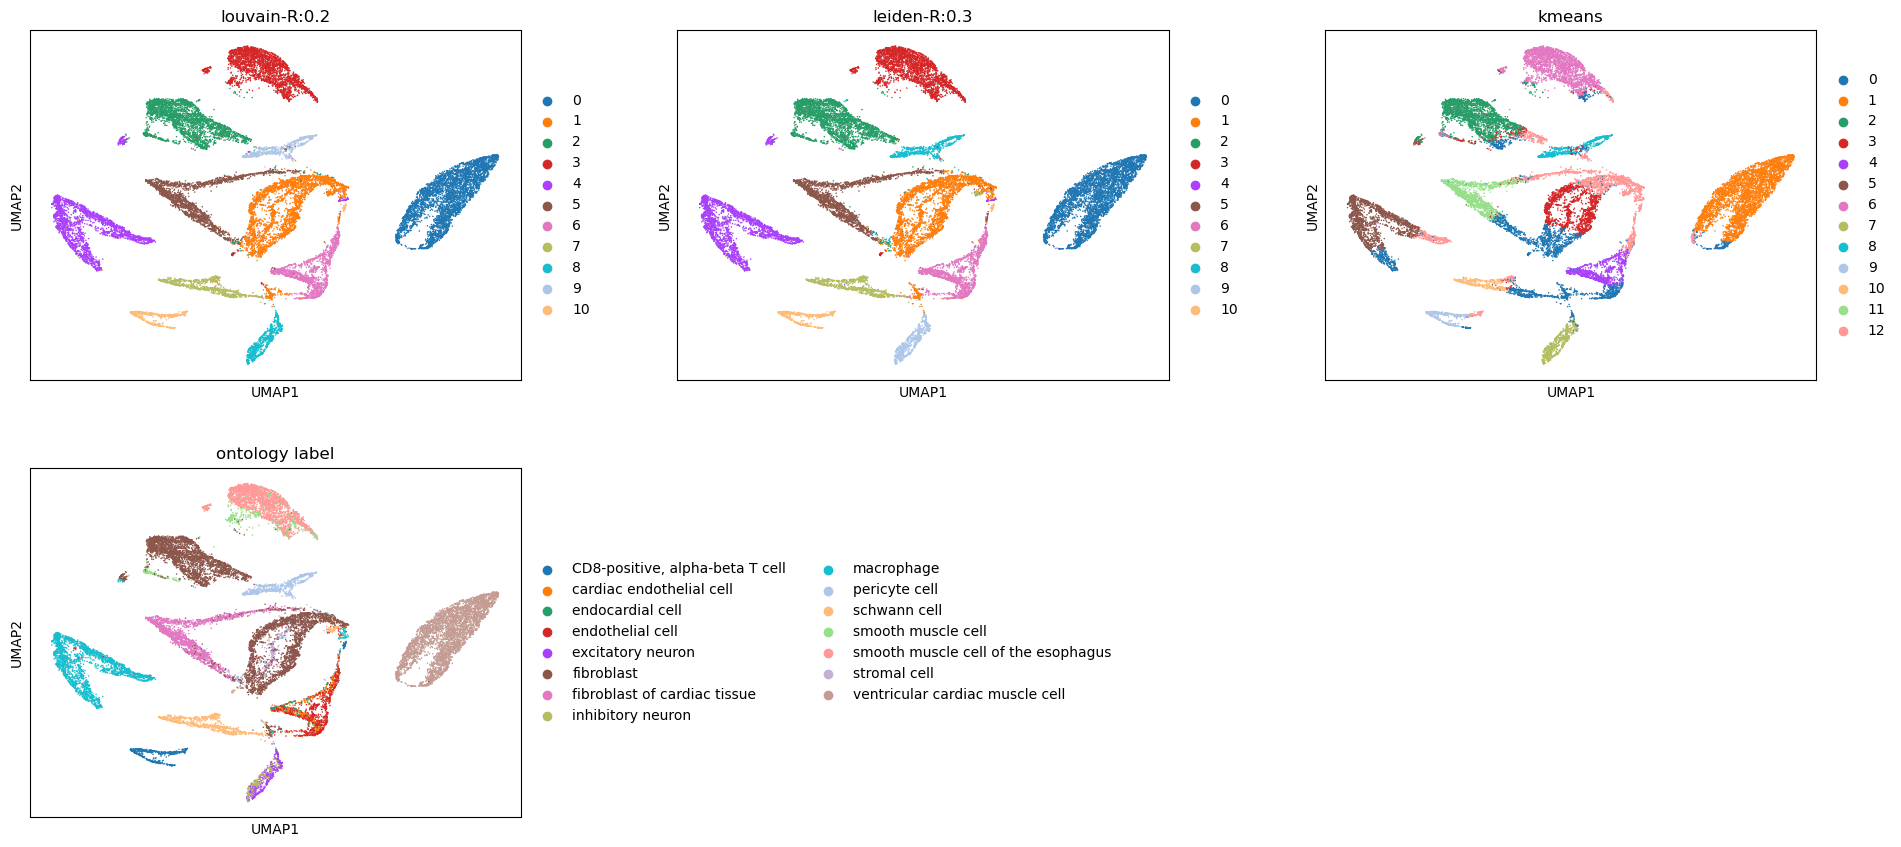

In [41]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color=[louvain_r_tag, leiden_r_tag, 'kmeans', 'ontology label'], wspace=0.2)

<Axes: title={'center': 'cell type'}, xlabel='UMAP1', ylabel='UMAP2'>

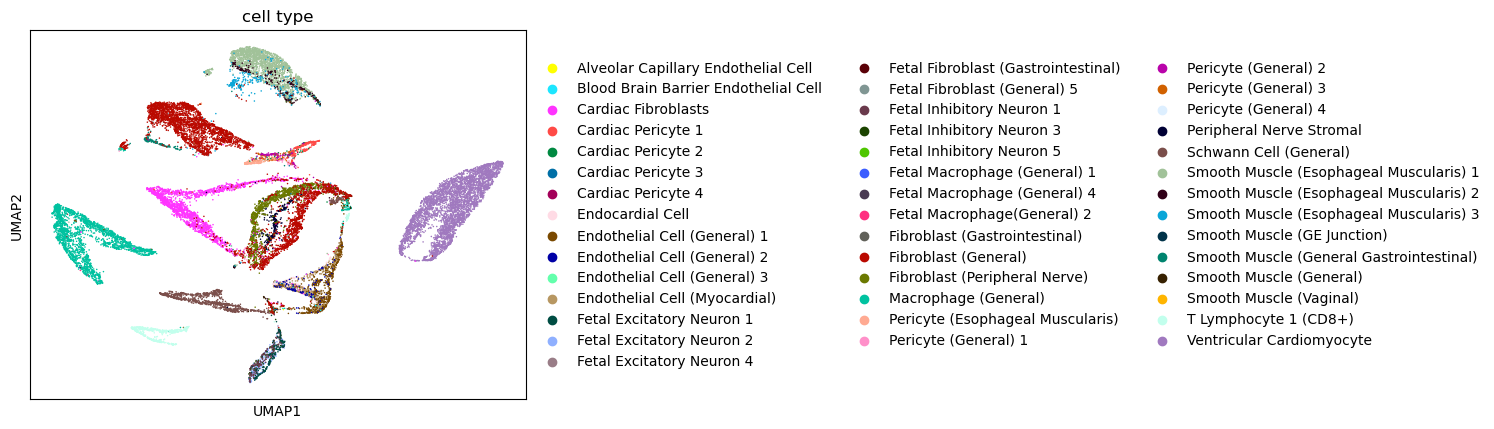

In [36]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color=['cell type'], wspace=0.5)

<Axes: title={'center': 'ontology label'}, xlabel='UMAP1', ylabel='UMAP2'>

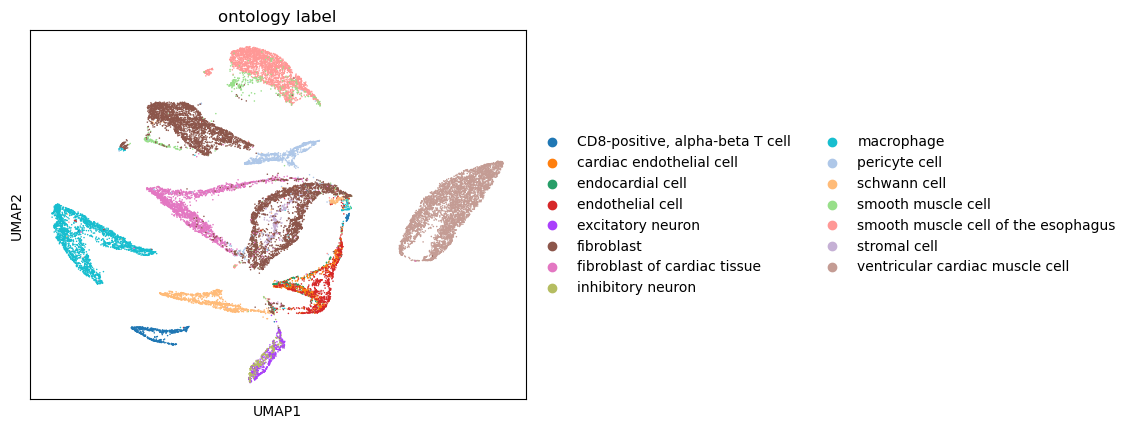

In [37]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color=['ontology label'], wspace=0.5)